In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go 
plt.style.use('ggplot')

In [2]:
stocks_df = pd.read_csv('stocks.csv')
stocks_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [3]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [4]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'],format='%Y-%m-%d')

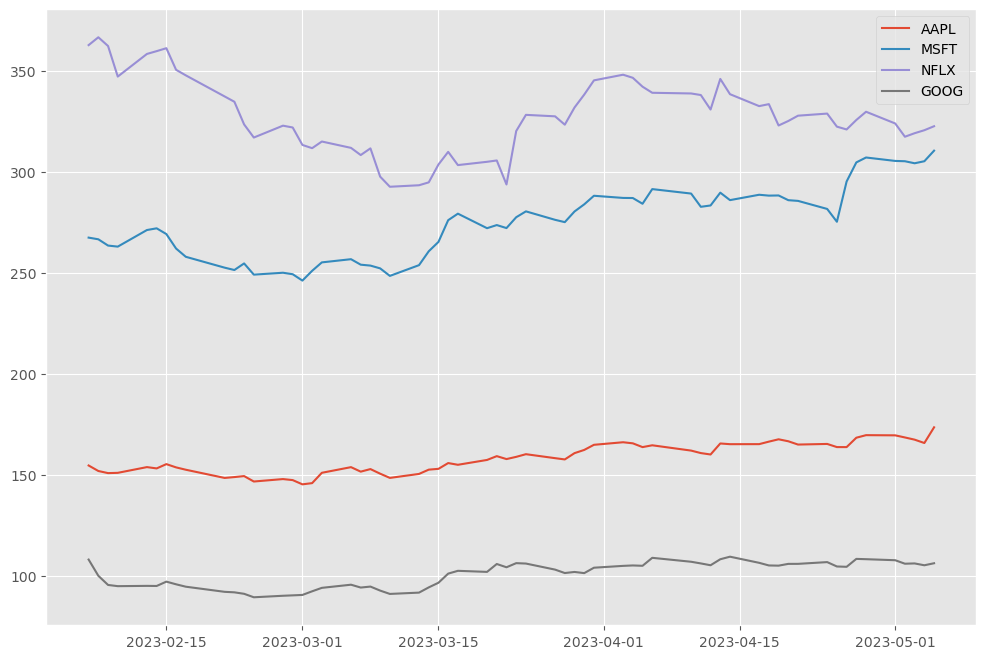

In [5]:
plt.figure(figsize=(12,8))
for ticket in stocks_df['Ticker'].unique():
    subset = stocks_df[stocks_df['Ticker'] == ticket]
    plt.plot(subset['Date'],subset['Close'])


plt.legend(stocks_df['Ticker'].unique())    
plt.show()


In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decomposition_plots(ticket:str):
    new_subset = stocks_df[stocks_df['Ticker']==ticket]
    result = seasonal_decompose(x=new_subset.Close,model='additive',period=5)
    plt.figure(figsize=(12,8))

    
    plt.subplot(3,1,1)
    plt.plot(new_subset.Close)
    
    plt.subplot(3,1,1)
    plt.plot(result.trend)
    plt.title(f'Trend And Actual Date {ticket}')
    
    plt.subplot(3,1,2)
    plt.plot(result.seasonal)
    plt.title(f'Seasonality {ticket}')
    
    plt.subplot(3,1,3)
    plt.plot(result.resid)
    plt.title(f'Residue {ticket}')
    
    plt.tight_layout()
    plt.show()

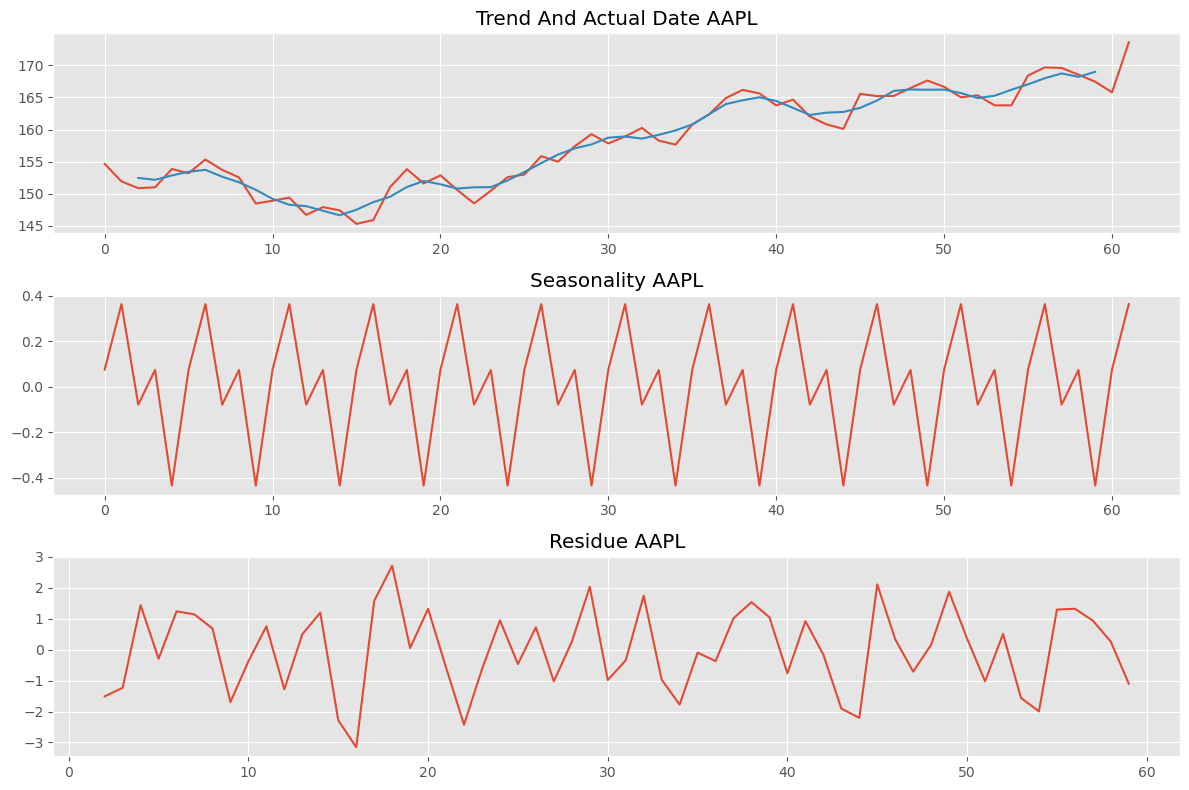

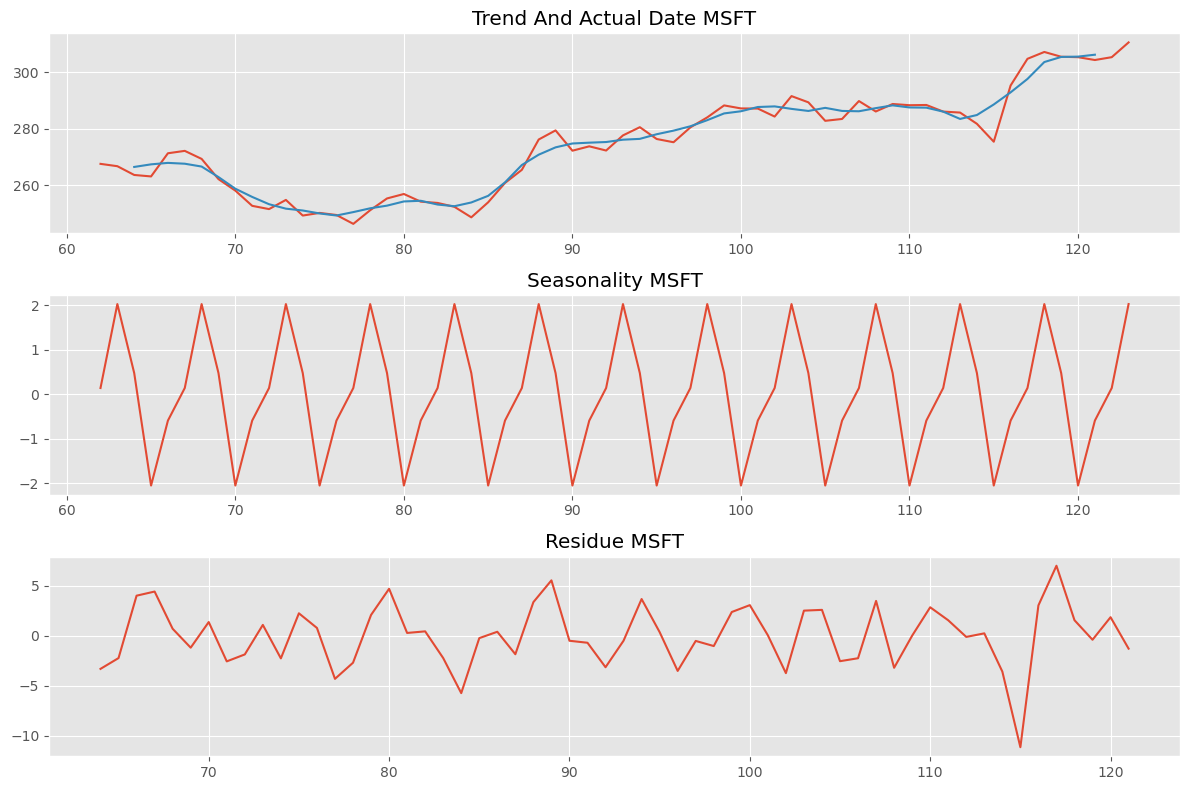

In [7]:
decomposition_plots(ticket='AAPL')
decomposition_plots(ticket='MSFT')

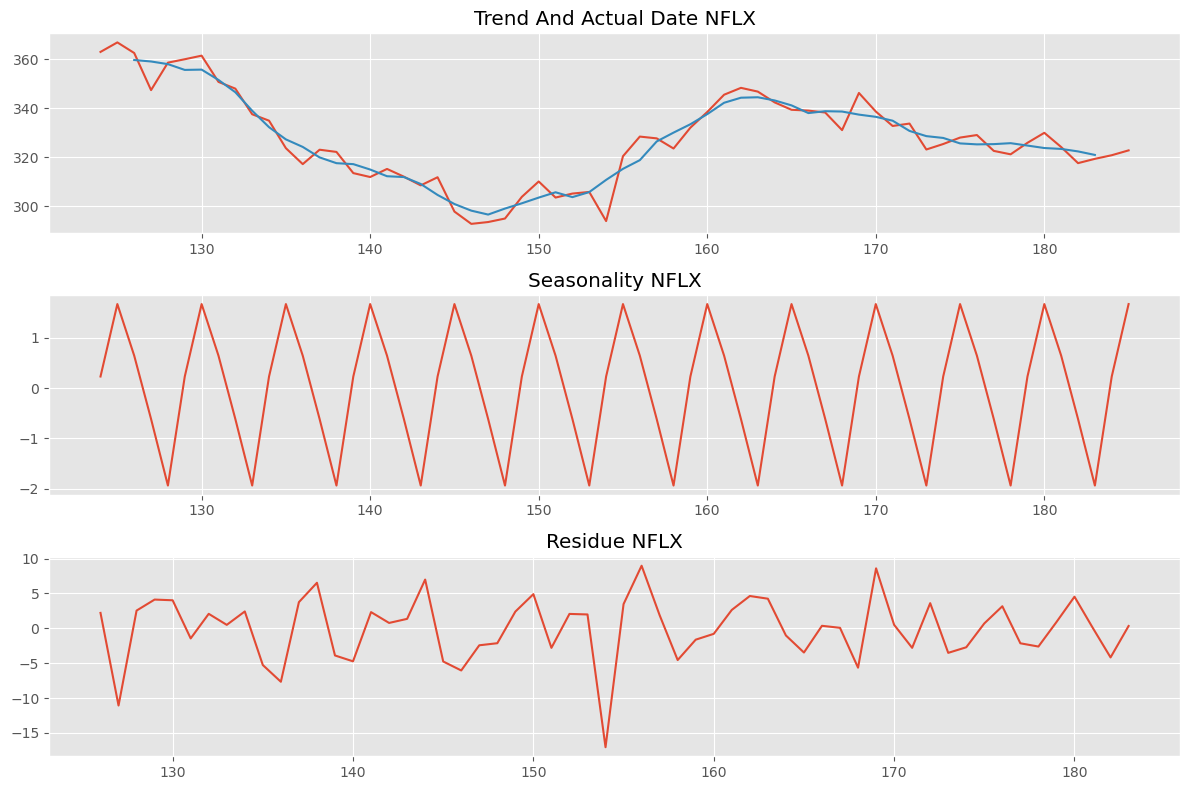

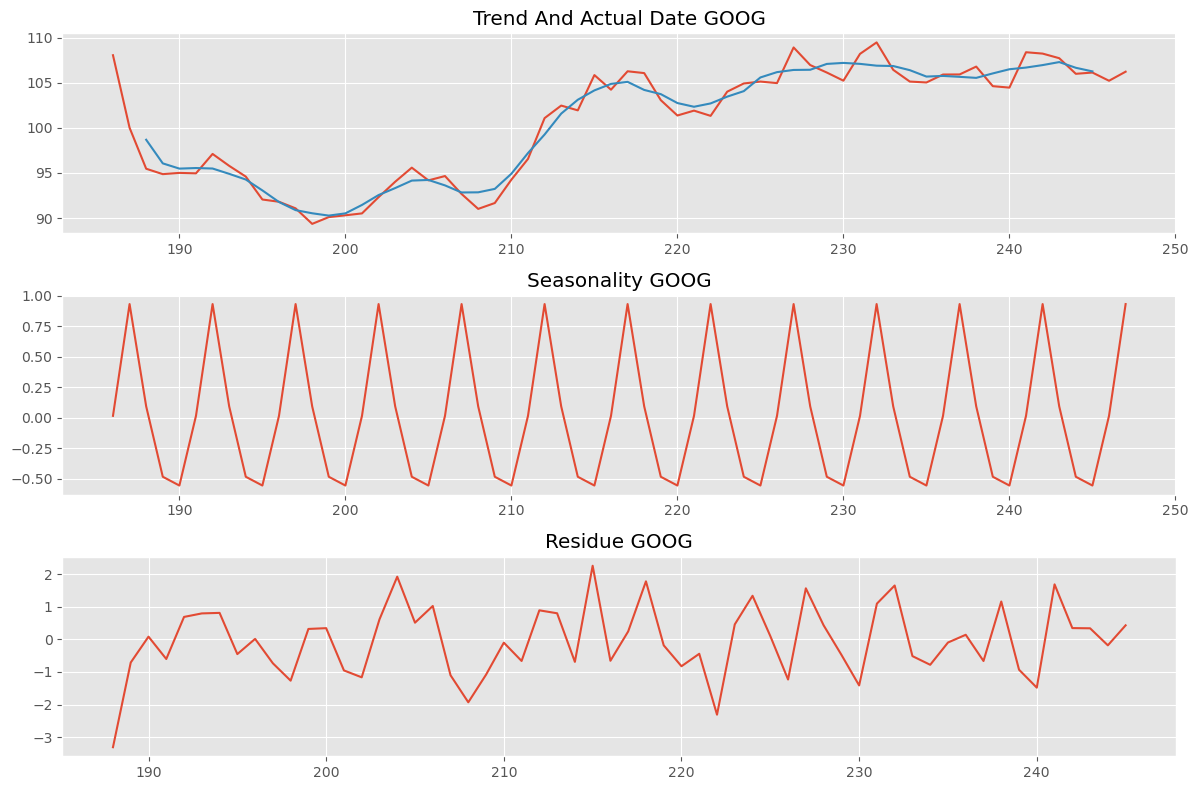

In [8]:
decomposition_plots(ticket='NFLX')
decomposition_plots(ticket='GOOG')


## EST 

In [27]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
def fit_model(ticket:str):
    test = stocks_df[stocks_df['Ticker']==ticket]
    series = test[['Close','Date']]
    series.set_index('Date',inplace=True)
    model = ETSModel(series['Close'],
                     error='add',trend='add', seasonal='add',
                     seasonal_periods=5,
                     damped_trend=True,
                     )
    fit = model.fit(maxiter=10000,disp=False)
    series['Close'].plot(label=ticket)
    fit.fittedvalues.plot(label=f'{ticket} fitted')
    


/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been

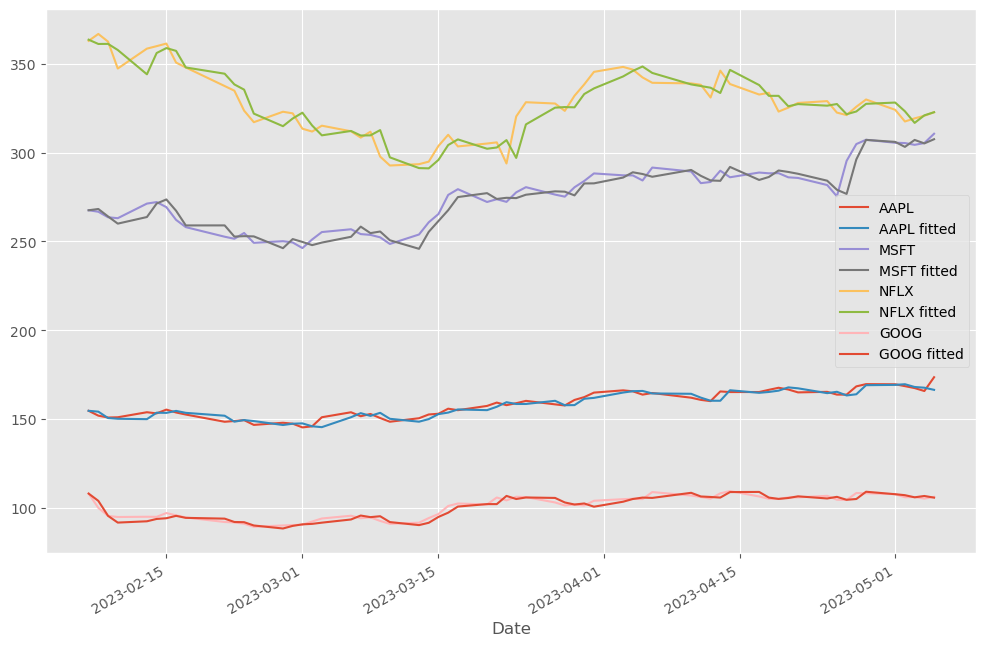

In [28]:
plt.figure(figsize=(12,8))
for ticket in stocks_df.Ticker.unique():
    fit_model(ticket)
plt.legend(loc= 7)

Trying out more complex models for better fit

## ARIMA

In [ ]:
import pandas as pd

test = stocks_df[stocks_df['Ticker'] == "AAPL"]

test['Date'] = pd.to_datetime(test['Date'])

series = test.set_index('Date')[['Close']]

series['Differencing-1'] = series['Close'].diff()

series['Differencing-2'] = series['Differencing-1'].diff()

series = series.dropna()


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
plt.plot(series['Close'])
plt.title('AAPL Close Prices')

plt.subplot(3, 1, 2)
plt.plot(series['Differencing-1'])
plt.title('First-order Differencing of AAPL Close Prices')


plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_result_1 = adfuller(series['Differencing-1'].dropna())
print('ADF Statistic (First-order):', adf_result_1[0])
print('p-value (First-order):', adf_result_1[1])

Suggests first order differencing is good enough 

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(series['Differencing-1'].dropna(), lags=20, ax=plt.gca())
plt.title('ACF of First-order Differencing of AAPL Close Prices')

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

def fit_arima_model(ticket: str):
    test = stocks_df[stocks_df['Ticker'] == ticket]
    series = test[['Close', 'Date']]
    series.set_index('Date', inplace=True)
    series.index = pd.to_datetime(series.index)
    series = series.asfreq('D').fillna(method='ffill') 
    model = ARIMA(series['Close'], order=(0,1,1))
    fit = model.fit()
    print(fit.aic)
 
    
    
    series['Close'].plot(label=ticket)
    fit.fittedvalues.shift().plot(label=f'{ticket} fitted')






359.79216837926805


/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_6341/3144711887.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series.asfreq('D').fillna(method='ffill')
/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_6341/3144711887.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series.asfreq('D').fillna(method='ffill')
/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_6341/3144711887.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  series = series.asfreq('D').fillna(method='ffill')
/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_6341/3144711887.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.f

491.46906925851835
562.8466259148136
343.9372642819768


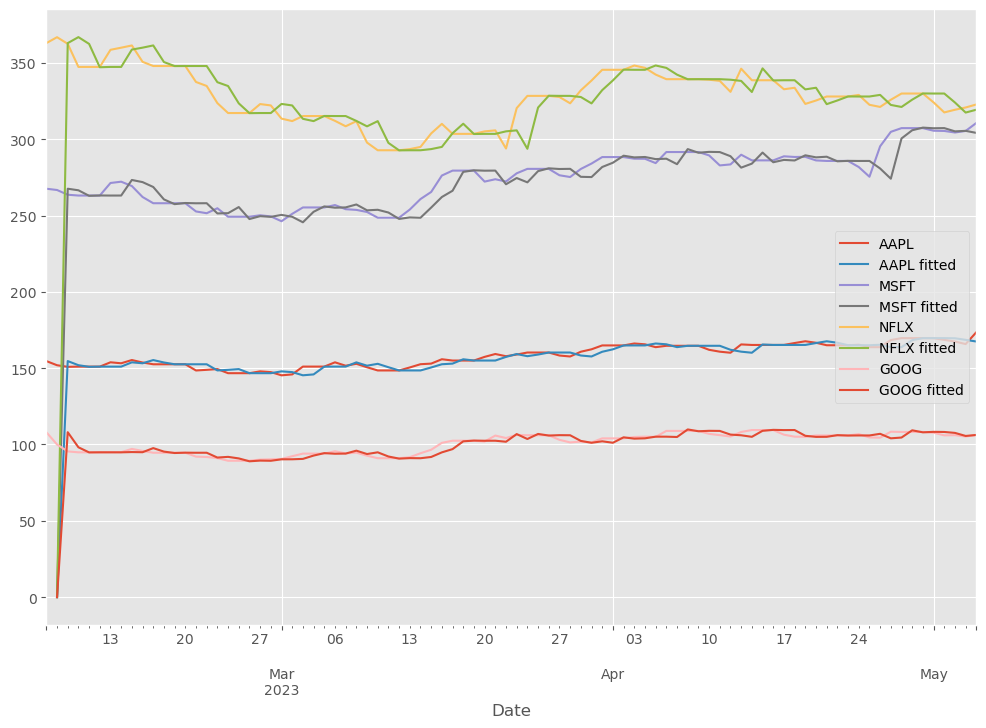

In [53]:
plt.figure(figsize=(12, 8))
for ticket in stocks_df.Ticker.unique():
    fit_arima_model(ticket)
plt.legend(loc=7)

In [2]:
ice_df = pd.read_csv('ice-cream.csv')
ice_df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [7]:
ice_df.rename(columns={'DATE':'Date','IPN31152N':'Production'},inplace=True)
ice_df['Date'] = pd.to_datetime(ice_df['Date'])


In [9]:
ice_df.set_index('Date',inplace=True)
ice_df

,Production
Date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


In [10]:
start_date = pd.to_datetime('2010-01-01')
ice_df = ice_df[start_date:]

In [11]:
ice_df.head() 

,Production
Date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


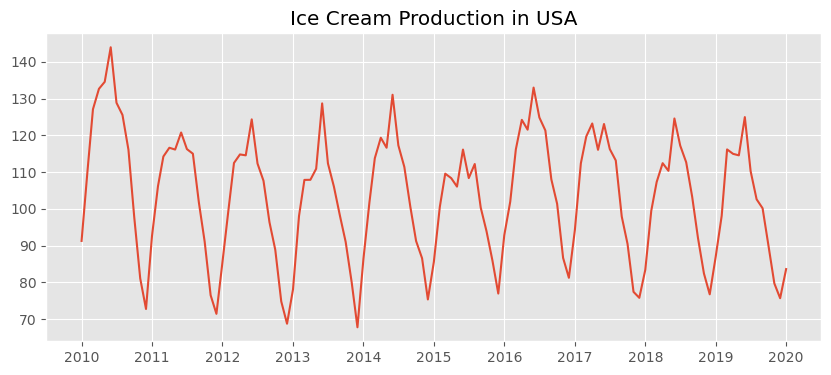

In [13]:
plt.figure(figsize=(10,4))
plt.plot(ice_df)
plt.title('Ice Cream Production in USA')
plt.show()

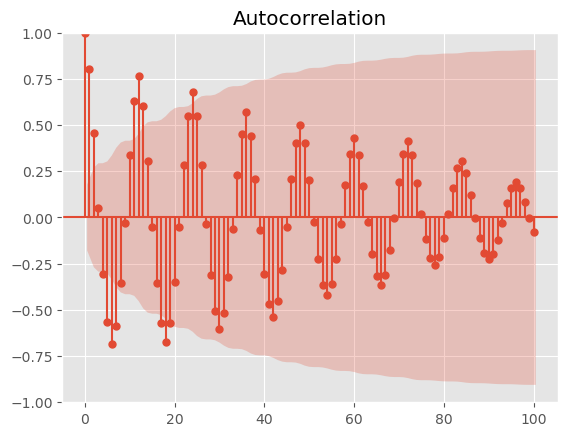

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf_plot = plot_acf(ice_df.Production,lags=100)

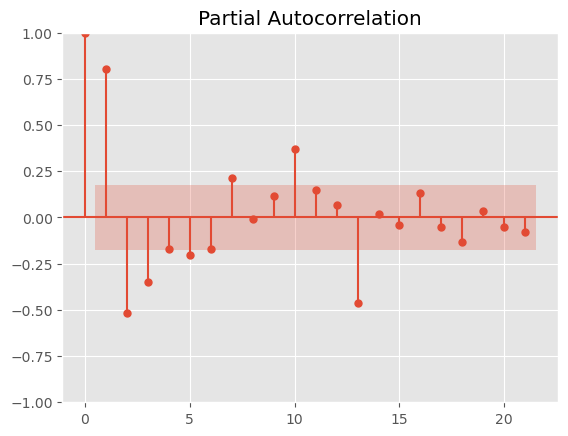

In [23]:
pacf_plot = plot_pacf(ice_df.Production)